<a href="https://colab.research.google.com/github/patelruday/Machine_learning/blob/main/clustring_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
cust=pd.read_csv('Mall_Customers.csv')

In [ ]:
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
cust.shape

(200, 5)

In [ ]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
cust.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
cust.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_7236\3831012153.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cust['Annual Income (k$)'])
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

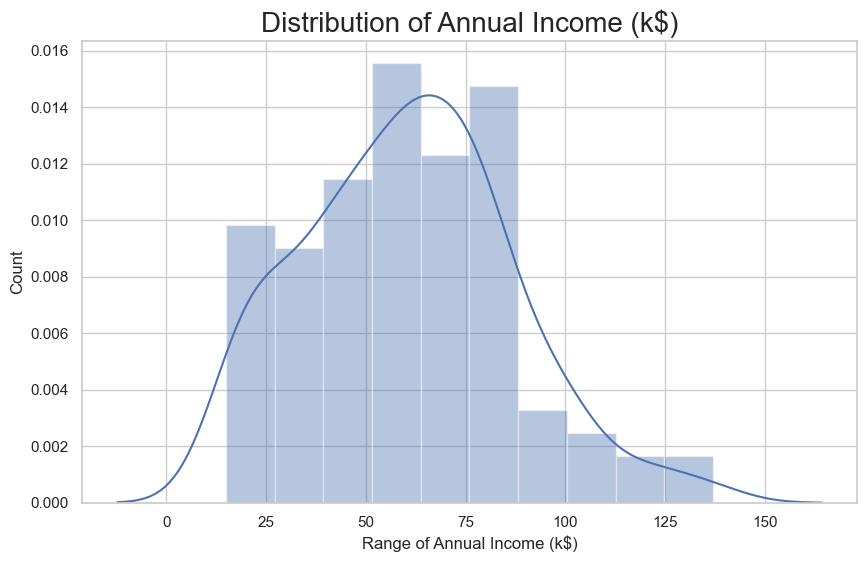

In [ ]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(cust['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

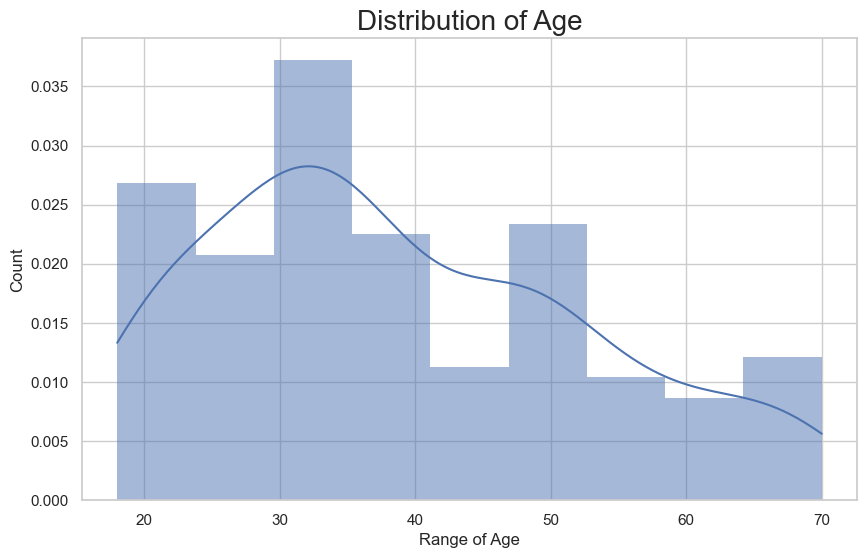

In [ ]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.histplot(cust['Age'], kde=True, stat="density", linewidth=0)
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

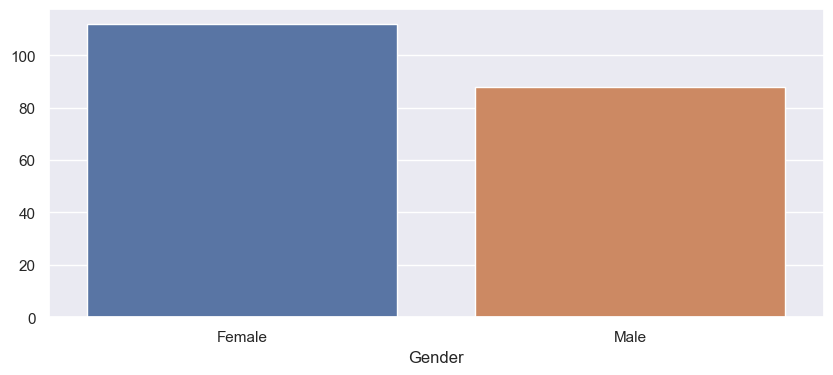

In [ ]:
genders = cust.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [ ]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
cust_data= cust.iloc[:, [3,4]]

In [ ]:
cust_data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


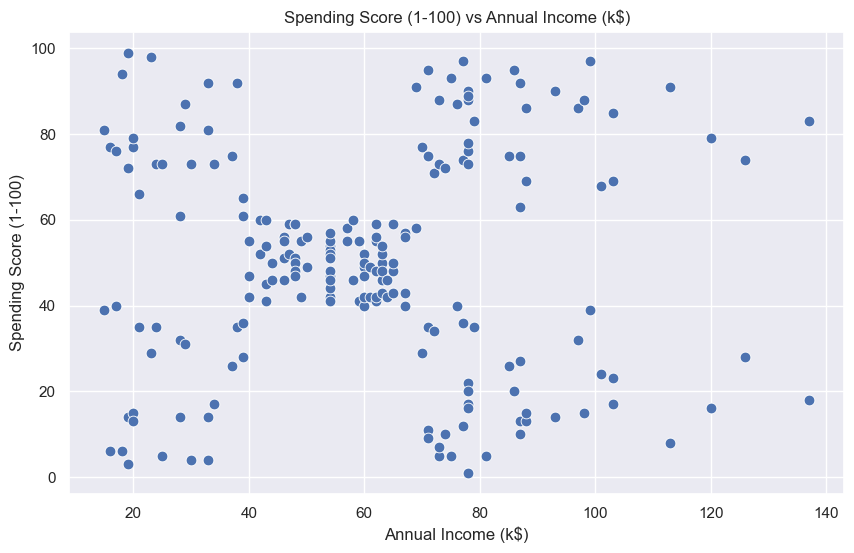

In [ ]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = cust_data['Annual Income (k$)'],y = cust_data['Spending Score (1-100)'], s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,30):
    km = KMeans(i)
    km.fit(cust_data)
    wcss.append(km.inertia_)
np.array(wcss)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

array([269981.28      , 181363.5959596 , 106348.37306211,  73679.78903949,
        44448.45544793,  37271.88623659,  30259.65720729,  25022.48500453,
        21826.93630323,  19657.7836087 ,  17908.11410043,  16076.14476764,
        14495.8077815 ,  13236.29304526,  12220.520671  ,  11074.03313803,
         9955.35821334,   9391.95884116,   8487.131864  ,   8273.51291016,
         7847.3468735 ,   7180.43848818,   6958.30496985,   6383.04844143,
         6219.23173493,   5851.16168919,   5501.04517373,   5106.45676692,
         5003.28759427])

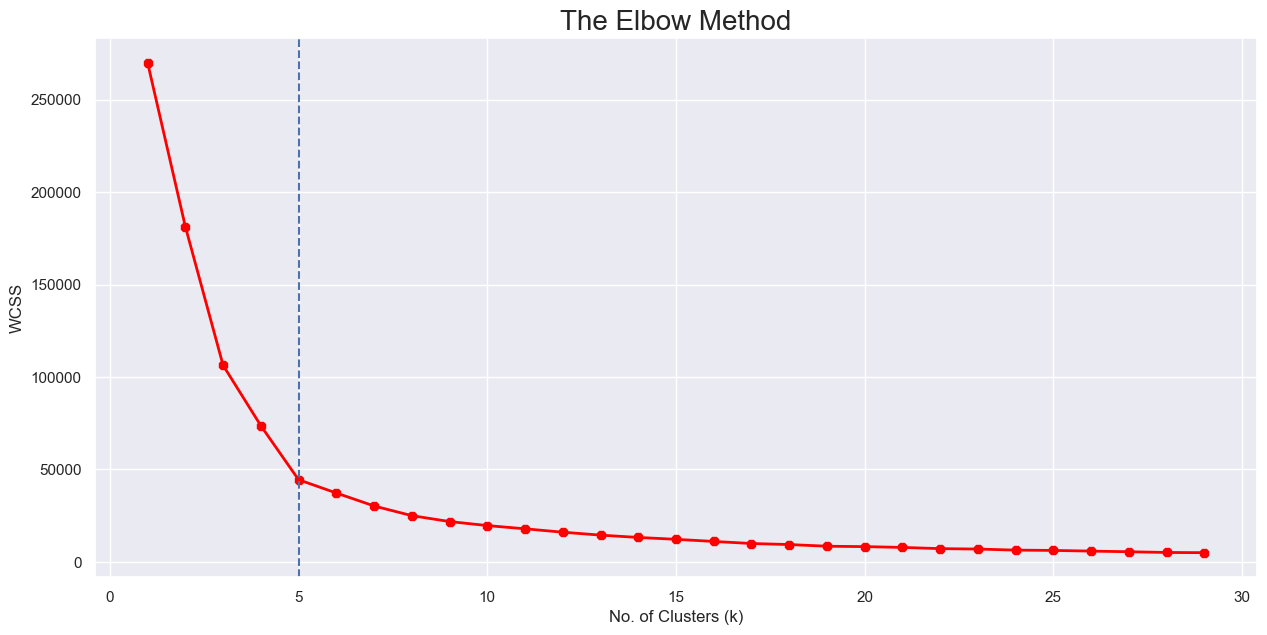

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=5, init='k-means++')
kms.fit(cust_data)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
clusters = cust_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(cust_data)
clusters.head()

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Annual Income (k$),Spending Score (1-100),Cluster_Prediction
0,15,39,1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,1


In [ ]:
kms.cluster_centers_

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

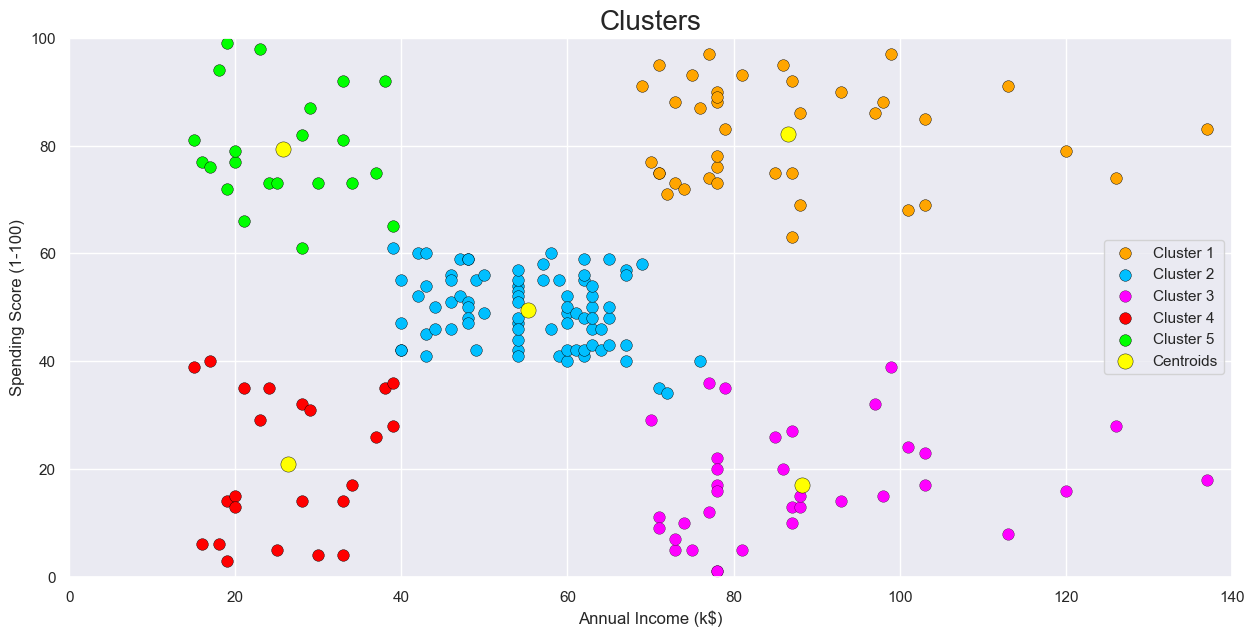

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')
plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters', fontsize = 20)
plt.show()

***Analysis***

Analyzing Data using the above graph becomes much more easier as it gives us a visual aid for better understanding of the data. Kmeans has divided the dataset into 5 clusters based on Annual income and the spending scores of the individual customers. The following clusters are created by the model,

Cluster Orange

Cluster Blue

Cluster Purple

Cluster Red

Cluster Green